In [1]:
import numpy as np
import cv2 as cv
from cv2 import aruco, cvtColor, COLOR_BGR2GRAY, LUT
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [2]:
imgs = glob("../../Kalibrierung/arucoTisch/*.jpeg")
imgs

['../../Kalibrierung/arucoTisch/arucoTisch1.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch2.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch3.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch4.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch5.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch6.jpeg',
 '../../Kalibrierung/arucoTisch/arucoTisch7.jpeg']

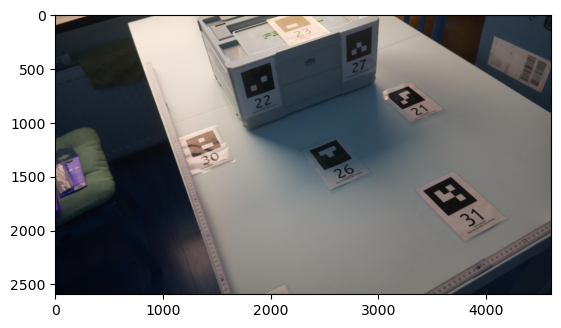

In [3]:

imgsCV = [cv.imread(i) for i in imgs]
plt.figure()
plt.imshow(imgsCV[0])
plt.show()

In [4]:
aruco_dict = aruco.Dictionary_create(32, 3)

In [5]:
parameter = aruco.DetectorParameters.create()
parameter.cornerRefinementMethod = aruco.CORNER_REFINE_SUBPIX
LUT_IN = [0, 158, 216, 255]
LUT_OUT = [0, 22, 80, 176]
lut = np.interp(np.arange(0, 256),
                LUT_IN, LUT_OUT).astype(np.uint8)

In [6]:
objPoints = pd.read_csv(
    "../../Kalibrierung/arucoTisch/coords.csv", sep=",",index_col=[0,1]).sort_index()
objPoints

x     y     z
marker ecke                  
20     0      2.2  13.0   0.0
       1      9.4  13.0   0.0
       2      9.4   5.8   0.0
       3      2.2   5.8   0.0
21     0     56.2  49.8   0.0
       1     63.4  49.8   0.0
       2     63.4  42.6   0.0
       3     56.2  42.6   0.0
22     0     20.7  56.0  17.2
       1     27.9  56.0  17.2
       2     27.9  56.0  10.0
       3     20.7  56.0  10.0
23     0     35.2  70.7  18.8
       1     42.4  70.7  18.8
       2     42.4  63.5  18.8
       3     35.2  63.5  18.8
26     0     29.2  41.7   0.0
       1     36.4  41.7   0.0
       2     36.4  34.5   0.0
       3     29.2  34.5   0.0
27     0     47.8  55.8  17.5
       1     55.0  55.8  17.5
       2     55.0  55.8  10.3
       3     47.8  55.8  10.3
30     0      3.9  61.7   0.0
       1     11.1  61.7   0.0
       2     11.1  54.5   0.0
       3      3.9  54.5   0.0
31     0     44.0  19.2   0.0
       1     51.2  19.2   0.0
       2     51.2  12.0   0.0
       3     44.0  12.0   0.0

In [7]:
corners = []
for j in range(len(imgsCV)):
    gray = cvtColor(imgsCV[j], COLOR_BGR2GRAY)
    tmp_corners, tmp_ids, _ = aruco.detectMarkers(
        gray, aruco_dict, parameters=parameter)
    for c, i in zip(tmp_corners, tmp_ids):
        for k in range(len(c[0])):
            corners.append([j, i[0], k, c[0][k][0], c[0][k][1]])


In [8]:
corners = pd.DataFrame(corners, columns=["img", "marker", "ecke", "x", "y"])
corners.set_index(["img", "marker", "ecke"], inplace=True)
corners

x            y
img marker ecke                          
0   31     0     3419.843750  1635.771851
           1     3675.737061  1508.217285
           2     3923.631592  1727.414429
           3     3653.983154  1868.333740
    26     0     2365.697510  1263.904053
...                      ...          ...
6   23     3     2537.212158   472.751923
    27     0     2963.383057   742.042358
           1     3214.907471   740.935486
           2     3167.665771   824.158081
           3     2933.521484   824.761169

[188 rows x 2 columns]

In [9]:
matched = corners.join(objPoints, lsuffix="_img", rsuffix="_obj")
matched.reset_index(inplace=True)
#matched.set_index(["img", "marker", "ecke"], inplace=True)
#matched.sort_index(inplace=True)
matched

,marker,ecke,img,x_img,y_img,x_obj,y_obj,z
0,20,0,1,855.691589,1824.485596,2.2,13.0,0.0
1,20,0,2,1360.091309,2231.089111,2.2,13.0,0.0
2,20,0,4,656.052673,1414.280762,2.2,13.0,0.0
3,20,0,5,971.834045,1178.996094,2.2,13.0,0.0
4,20,0,6,1504.614868,2193.958740,2.2,13.0,0.0
...,...,...,...,...,...,...,...,...
183,31,3,2,2705.116943,2296.995117,44.0,12.0,0.0
184,31,3,3,4394.534668,1785.932129,44.0,12.0,0.0
185,31,3,4,1138.240479,2274.562500,44.0,12.0,0.0
186,31,3,5,1502.832764,2121.072754,44.0,12.0,0.0


In [58]:
mtx = np.array([[3.48172482e+03, 0.00000000e+00, 2.30250916e+03],
                [0.00000000e+00, 3.47313834e+03, 1.31660435e+03],
                [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
dist = np.array([[-1.41372220e-02,  2.43909839e-01,
                1.15659062e-03,  1.28627153e-04,  -5.96950573e-01]])
#dist = np.array([[0, 0, 0, 0, 0]])

array([[ -6.15097004,  35.22350354,  53.66376454],
       [-34.46542229,  20.55196687,  67.55936383],
       [-32.02935086,  40.65378911, 104.28325597],
       [ 15.36409623,  23.55882053,  19.27931318],
       [-57.14440563,   4.70618204,  90.24378426],
       [-54.47008001,   0.11934384, 107.51119973],
       [-28.04204838,  41.24713803, 110.45168081]])

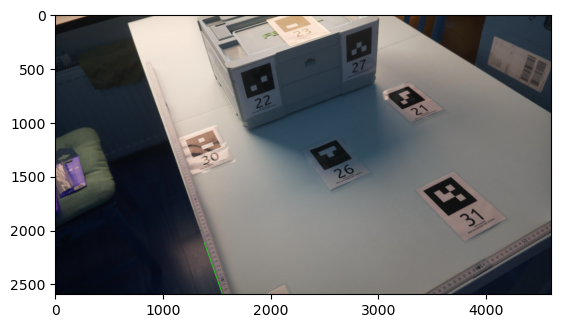

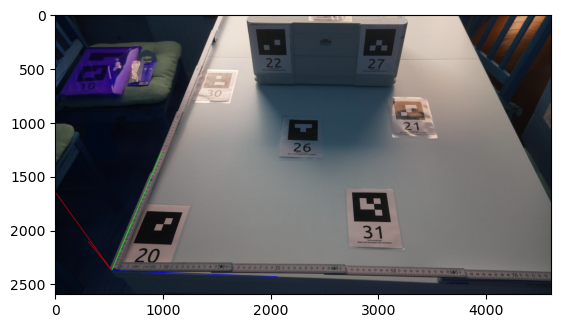

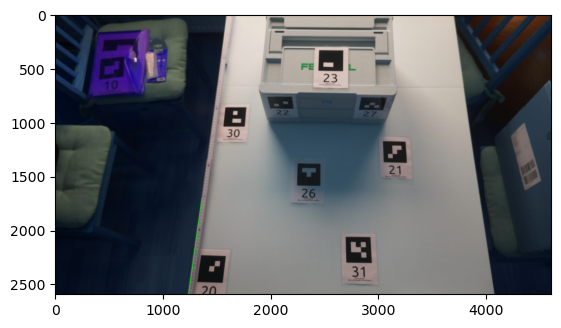

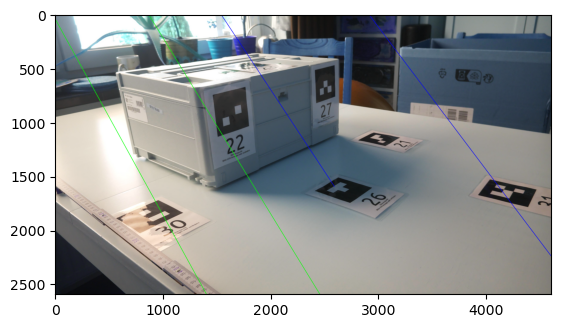

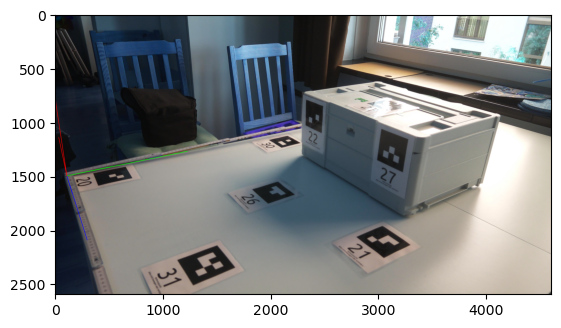

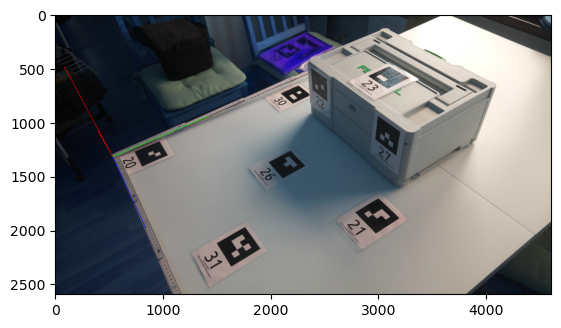

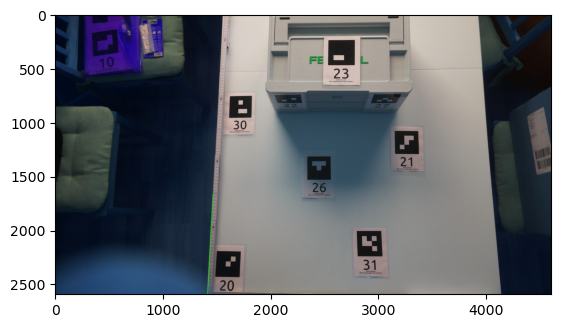

<Figure size 640x480 with 0 Axes>

In [63]:
imgCoords = []
for i in range(len(imgsCV)):
    l = matched.reset_index().where(matched["img"] == i).dropna().to_numpy()
    imgPointsTmp = l[:, 4:6]
    objPointsTmp = l[:, 6:9]
    retval, rvec, tvec = cv.solvePnP(objPointsTmp, imgPointsTmp, mtx, dist)
    imgCoords.append(tvec[:, 0])
    img = cv.drawFrameAxes(imgsCV[i], mtx, dist, rvec, tvec, 30)
    plt.imshow(img)
    plt.figure()
imgCoords = np.array(imgCoords)
imgCoords

In [12]:
import matplotlib.pyplot as plt

In [13]:
imgCoords[0]

array([-6.15097004, 35.22350354, 53.66376454])

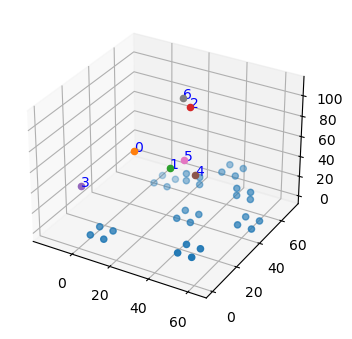

In [60]:
fig = plt.figure(figsize=(4,4))
oP = objPoints.to_numpy()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(imgCoords[:,1], imgCoords[:,0], imgCoords[:,2])
ax.scatter(oP[:,0], oP[:,1], oP[:,2])
for i in range(len(imgCoords)):
    ax.scatter(-imgCoords[i,0], imgCoords[i,1], imgCoords[i,2])
    ax.text(-imgCoords[i,0], imgCoords[i,1], imgCoords[i,2], str(i), color='blue')
plt.show()



In [29]:
for p in imgCoords:
    print("v", -p[0], p[1], p[2])
for p in objPoints.to_numpy():
    print("v", p[0], p[1], p[2])

v -6.150970044089393 35.22350354414701 53.66376453885235
v -34.46542229052408 20.5519668708477 67.55936383364511
v -32.0293508631924 40.65378911256221 104.28325596824416
v 15.364096226598834 23.55882053302285 19.279313179845225
v -57.144405626909474 4.706182039929605 90.24378426271046
v -54.470080006264226 0.11934383562268526 107.51119973328275
v -28.042048383719433 41.24713802842638 110.45168080652365
v 2.2 13.0 0.0
v 9.4 13.0 0.0
v 9.4 5.8 0.0
v 2.2 5.8 0.0
v 56.2 49.8 0.0
v 63.4 49.8 0.0
v 63.4 42.6 0.0
v 56.2 42.6 0.0
v 20.7 56.0 17.2
v 27.9 56.0 17.2
v 27.9 56.0 10.0
v 20.7 56.0 10.0
v 35.2 70.7 18.8
v 42.4 70.7 18.8
v 42.4 63.5 18.8
v 35.2 63.5 18.8
v 29.2 41.7 0.0
v 36.4 41.7 0.0
v 36.4 34.5 0.0
v 29.2 34.5 0.0
v 47.8 55.8 17.5
v 55.0 55.8 17.5
v 55.0 55.8 10.3
v 47.8 55.8 10.3
v 3.9 61.7 0.0
v 11.1 61.7 0.0
v 11.1 54.5 0.0
v 3.9 54.5 0.0
v 44.0 19.2 0.0
v 51.2 19.2 0.0
v 51.2 12.0 0.0
v 44.0 12.0 0.0
